# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [281]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [282]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [283]:
#  1. Get the total rides for each city type
total_ride_city = pyber_data_df.groupby(["type"]).count()["ride_id"]



In [284]:
# 2. Get the total drivers for each city type
total_drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]


In [285]:
#  3. Get the total amount of fares for each city type
total_fares_by_city = pyber_data_df.groupby(["type"]).sum()["fare"]


In [286]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares_by_city/total_ride_city


In [287]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares_by_city/total_drivers_by_city


In [288]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = { 'Total Rides' : total_ride_city,
                  'Total Drivers' : total_drivers_by_city,
                  'Total Fares' : total_fares_by_city,
                  'Average Fare per Ride' : avg_fare_per_ride,
                  'Average Fare per Driver' : avg_fare_per_driver
                 }

pyber_summary_df = pd.DataFrame (pyber_summary, columns= ['Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver'] )

pyber_summary_df
              

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [289]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [290]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [291]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [292]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
total_fare_by_date_df

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [293]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_by_date_df = total_fare_by_date_df.reset_index()
total_fare_by_date_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [294]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_fare_by_daterange_df = pd.pivot_table(total_fare_by_date_df, index = "date", columns = "type", values = "fare")

total_fare_by_daterange_df.head()


type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [295]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
total_fare_by_daterange_df.index = pd.to_datetime(total_fare_by_daterange_df.index)
total_fare_by_daterange_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [296]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
from datetime import datetime as dt
total_fare_by_daterange_df = total_fare_by_daterange_df.loc[(total_fare_by_daterange_df.index >= dt(year=2019, month=1, day=1)) & (total_fare_by_daterange_df.index <=dt(year=2019, month=4, day=29))]
total_fare_by_daterange_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36
2019-04-09 08:47:00,NaN,NaN,4.95
2019-04-09 09:17:00,NaN,NaN,20.31


In [297]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fare_by_daterange_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [298]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Sum_of_fares_per_week = total_fare_by_daterange_df.resample("W").sum()
Sum_of_fares_per_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


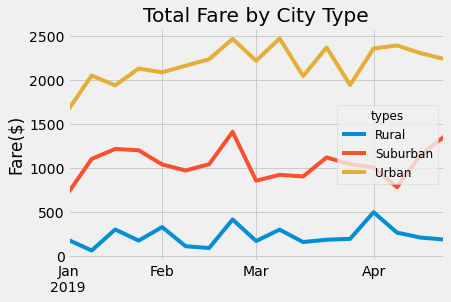

In [299]:

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
Sum_of_fares_per_week.plot()

plt.xlabel("")
plt.ylabel("Fare($)")
plt.title("Total Fare by City Type")

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
          loc="best", title="types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")